# OpenCV 임계점(Threshold) 처리 실습

Colab 환경에서 실행 가능하며, OpenCV의 **이진화(Thresholding)** 기법을 다룹니다.

## 주요 내용
1. **기본 이진화** (`cv2.threshold`)
2. **다양한 Threshold 타입** (`THRESH_BINARY`, `THRESH_BINARY_INV`, `THRESH_TRUNC`, etc.)
3. **적응형 임계점(Adaptive Threshold)** (`cv2.adaptiveThreshold`)
4. 추가 예시 및 **과제**

각 함수별 파라미터 설명과 실습 결과를 함께 제시합니다. Colab에서 이미지를 표시하기 위해 `cv2_imshow` 함수를 사용합니다.

## 1. 환경 설정 및 라이브러리 임포트
Colab에서 OpenCV가 미설치된 경우, 아래 셀에서 `opencv-python-headless`를 설치합니다. 이후 필요한 라이브러리를 임포트합니다.

In [ ]:
!pip install opencv-python-headless

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print("OpenCV version:", cv2.__version__)

OpenCV version: 4.10.0


## 2. 예제용 이미지 다운로드 및 불러오기
Threshold 실습용으로 **그레이스케일 이미지**와 **손글씨(또는 텍스트) 이미지**를 가져옵니다.
현재는 placeholder 이미지를 300×300 크기로 다운로드하도록 해두었으므로, 필요에 따라 적절한 이미지로 변경해 사용하십시오.

'gray_image.jpg' 로드 성공!


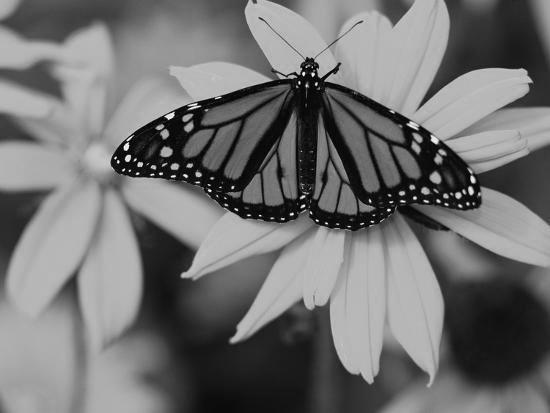

'hand_writing_image.jpg' 로드 성공!


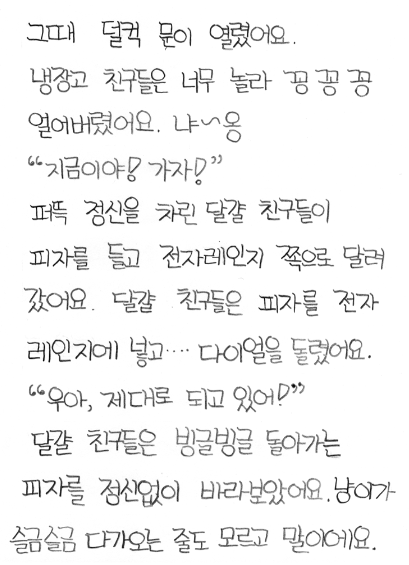

In [ ]:
# 예제용 이미지 다운로드
!wget -O gray_image.jpg "https://blog.aspose.cloud/ko/imaging/grayscale-image-in-java/images/grayscale.jpg" -q
!wget -O hand_writing_image.jpg "https://thumbnews.nateimg.co.kr/view610///news.nateimg.co.kr/orgImg/ae/2023/10/13/ae_1697173144021_372706_4.png" -q

# 이미지 불러오기 (그레이스케일로 불러옴)
gray_image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)
hand_writing_image = cv2.imread('hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

# 예제 이미지 로드 확인
if gray_image is None:
    print("'gray_image.jpg' 로드 실패. 이미지 경로를 확인하세요.")
else:
    print("'gray_image.jpg' 로드 성공!")
    cv2_imshow(gray_image)

if hand_writing_image is None:
    print("'hand_writing_image.jpg' 로드 실패. 이미지 경로를 확인하세요.")
else:
    print("'hand_writing_image.jpg' 로드 성공!")
    cv2_imshow(hand_writing_image)

# 3. 기본 이진화 (Global Thresholding)
기본적인 임계점 처리는 **`cv2.threshold`** 함수를 사용합니다.

```python
ret, dst = cv2.threshold(
    src,            # 입력 그레이스케일 이미지
    thresh,         # 임계값
    maxval,         # 임계값 이상일 경우 적용할 값
    type            # Threshold 타입, ex) cv2.THRESH_BINARY
)
```

### 주요 Threshold 타입
- **`cv2.THRESH_BINARY`**
  - 픽셀 값 >= 임계값 → maxval
  - 픽셀 값 < 임계값 → 0
- **`cv2.THRESH_BINARY_INV`**
  - `THRESH_BINARY`의 반전
- **`cv2.THRESH_TRUNC`**
  - 픽셀 값 > 임계값 → 임계값
  - 픽셀 값 <= 임계값 → 픽셀 값 그대로
- **`cv2.THRESH_TOZERO`**
  - 픽셀 값 >= 임계값 → 픽셀 값 그대로
  - 픽셀 값 < 임계값 → 0
- **`cv2.THRESH_TOZERO_INV`**
  - `THRESH_TOZERO`의 반전

아래 코드에서는 같은 이미지에 대해 여러 가지 타입의 Thresholding 결과를 비교해봅니다.

[THRESH_BINARY]


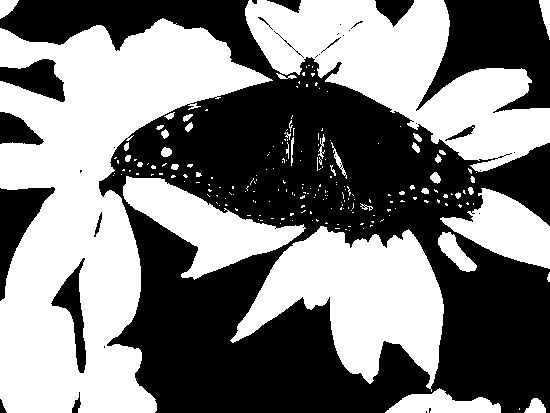

[THRESH_BINARY_INV]


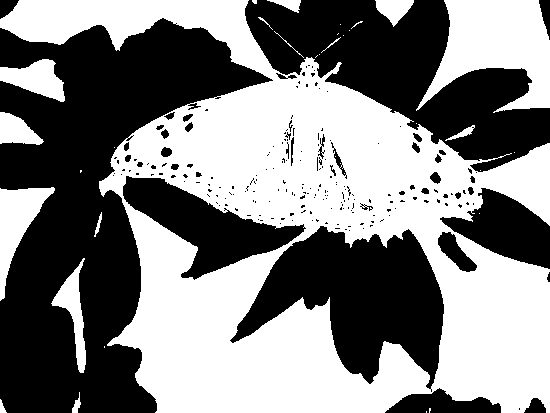

[THRESH_TRUNC]


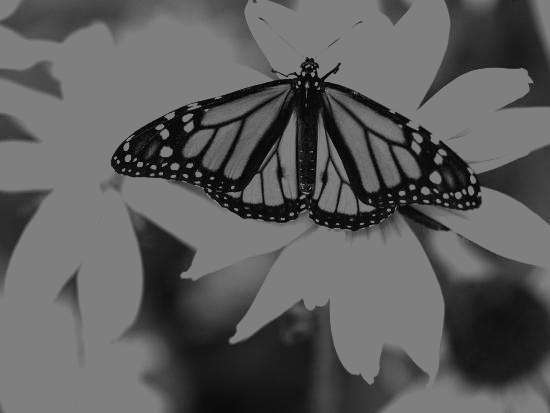

[THRESH_TOZERO]


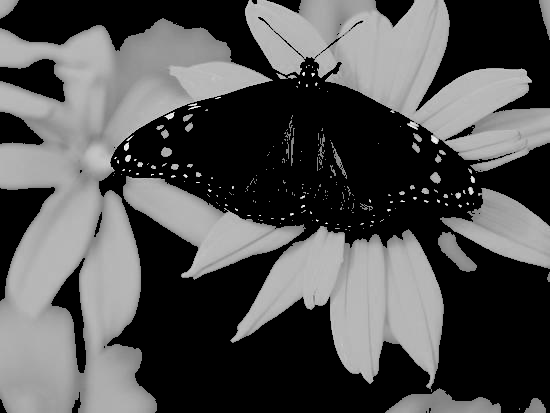

[THRESH_TOZERO_INV]


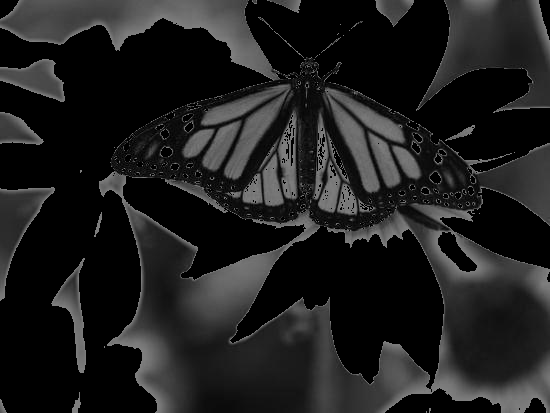

In [ ]:
if gray_image is not None:
    # 임계값 설정
    threshold_value = 127
    max_value = 255

    # (1) THRESH_BINARY
    ret, thres_binary = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_BINARY)
    print("[THRESH_BINARY]")
    cv2_imshow(thres_binary)

    # (2) THRESH_BINARY_INV
    ret, thres_binary_inv = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_BINARY_INV)
    print("[THRESH_BINARY_INV]")
    cv2_imshow(thres_binary_inv)

    # (3) THRESH_TRUNC
    ret, thres_trunc = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_TRUNC)
    print("[THRESH_TRUNC]")
    cv2_imshow(thres_trunc)

    # (4) THRESH_TOZERO
    ret, thres_tozero = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_TOZERO)
    print("[THRESH_TOZERO]")
    cv2_imshow(thres_tozero)

    # (5) THRESH_TOZERO_INV
    ret, thres_tozero_inv = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_TOZERO_INV)
    print("[THRESH_TOZERO_INV]")
    cv2_imshow(thres_tozero_inv)
else:
    print("gray_image가 None입니다. 확인 후 다시 시도하세요.")

## 4. 적응형 임계점 처리 (Adaptive Threshold)
글씨나 조명이 고르지 않은 이미지에서는 **글로벌 임계값(고정된 임계값)**만으로는 좋은 결과를 얻기 어렵습니다.

이럴 때, **`cv2.adaptiveThreshold`**를 사용하면 **이미지를 작은 영역(블록)으로 나누어** 각 영역에서 동적으로 임계값을 계산하여 이진화할 수 있습니다.

```python
dst = cv2.adaptiveThreshold(
    src,                          # 그레이스케일 이미지
    maxValue,                     # 임계값 이상일 때 적용할 값
    adaptiveMethod,               # (cv2.ADAPTIVE_THRESH_MEAN_C or cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    thresholdType,                # 보통 THRESH_BINARY 또는 THRESH_BINARY_INV
    blockSize,                    # 주변 픽셀을 참고할 영역 크기 (홀수)
    C                             # 평균이나 가우시안으로 계산된 임계값에서 빼줄 상수
)
```

- **blockSize**: 주변 픽셀의 영역 크기. 반드시 홀수여야 합니다. (예: 3, 5, 7...)  
- **C**: 실제 계산된 임계값에서 **감산**할 값. 배경이 밝거나 어두울 때 유용하게 조절할 수 있습니다.

### `cv2.ADAPTIVE_THRESH_MEAN_C` vs `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`
- **MEAN_C**: blockSize 내의 픽셀 값 평균을 이용해 임계값을 결정.
- **GAUSSIAN_C**: blockSize 내의 픽셀 값에 가우시안 가중치를 주어 평균을 계산.

아래 예시에서는 손글씨 이미지(`hand_writing_image`)에 적응형 이진화를 적용해 봅니다.

[Adaptive Mean Threshold]


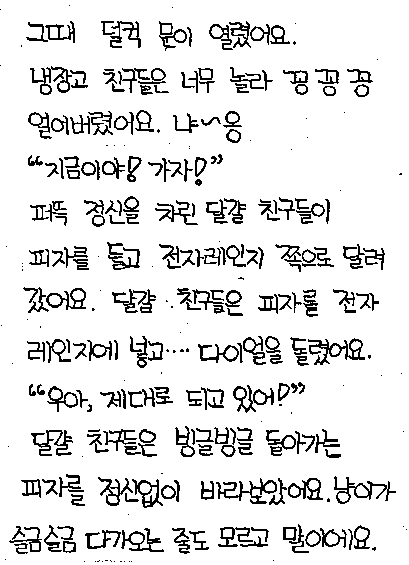

[Adaptive Gaussian Threshold]


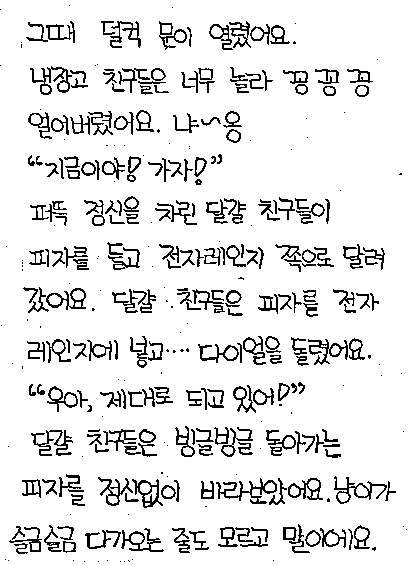

In [ ]:
if hand_writing_image is not None:
    # 블록 크기, C 값 설정
    block_size = 21
    C_val = 3

    # (1) ADAPTIVE_THRESH_MEAN_C
    thres_adaptive_mean = cv2.adaptiveThreshold(
        hand_writing_image,
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        block_size,
        C_val
    )
    print("[Adaptive Mean Threshold]")
    cv2_imshow(thres_adaptive_mean)

    # (2) ADAPTIVE_THRESH_GAUSSIAN_C
    thres_adaptive_gaussian = cv2.adaptiveThreshold(
        hand_writing_image,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        block_size,
        C_val
    )
    print("[Adaptive Gaussian Threshold]")
    cv2_imshow(thres_adaptive_gaussian)
else:
    print("hand_writing_image가 None입니다. 확인 후 다시 시도하세요.")

## 5. (추가 예제) Otsu's Binarization
만약 임계값을 사용자 지정 없이 **자동으로** 결정하고 싶다면, **오츄 알고리즘(Otsu's method)**를 사용할 수 있습니다.

```python
ret, dst = cv2.threshold(
    src, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
```
- **thresh** 파라미터를 0으로 주고, **`cv2.THRESH_OTSU`**를 추가로 지정하면 자동으로 임계값을 결정합니다.

아래에서는 `gray_image`에 대해 Otsu 이진화를 해 봅니다.

[Otsu's Threshold] 자동으로 찾은 임계값: 105.0


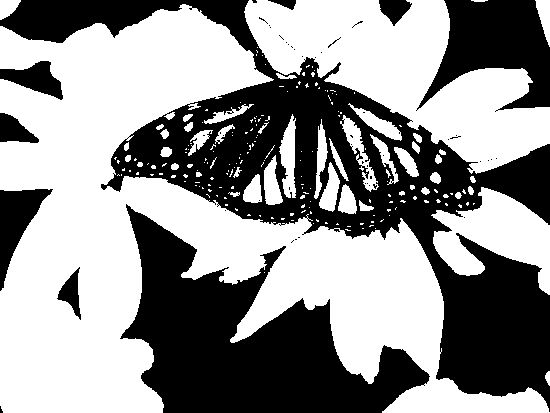

In [ ]:
if gray_image is not None:
    # 오츄 알고리즘
    ret_otsu, thres_otsu = cv2.threshold(
        gray_image,
        0,  # 임의로 0
        255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    print(f"[Otsu's Threshold] 자동으로 찾은 임계값: {ret_otsu}")
    cv2_imshow(thres_otsu)
else:
    print("gray_image가 None입니다. 확인 후 다시 시도하세요.")

# 6. 과제
1. **블록 크기(blockSize)와 C 값을 바꿔가며 적응형 임계점 결과 비교**
   - 21, 31, 51 등 다양한 블록 크기를 사용해 보세요.
   - C 값을 0, 5, 10 등으로 조절해 보세요. 결과가 어떻게 달라지나요?
2. **오츄 알고리즘 + 가우시안 블러**
   - 오츄 알고리즘 적용 전, 이미지를 가우시안 블러(`cv2.GaussianBlur`)로 미리 스무딩하면 더 나은 결과가 나올 수도 있습니다.
   - 예: `blurred = cv2.GaussianBlur(gray_image, (5,5), 0)` 후 `threshold` 적용.
3. **Color 이미지 이진화**
   - 컬러 이미지를 그레이스케일로 변환한 뒤 이진화를 적용해 보세요.
   - `cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)`
4. **ROI(Region of Interest)만 이진화**
   - 이미지 일부 영역만 잘라 그 부분만 이진화를 시도해 보세요.

아래 셀에는 **오츄 알고리즘 + 가우시안 블러**를 시도해 보는 간단한 예시가 포함되어 있습니다.

## 6.1 과제 예시: 가우시안 블러 후 오츄 알고리즘 적용

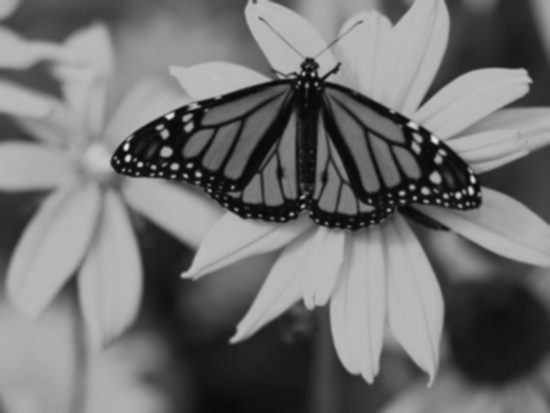

[Otsu after GaussianBlur] 자동으로 찾은 임계값: 106.0


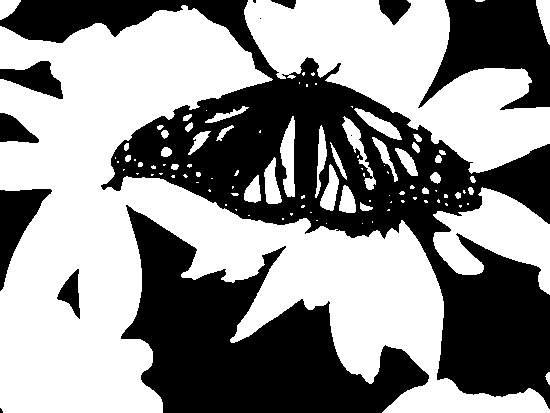

In [ ]:
if gray_image is not None:
    # (1) 블러 적용
    blurred = cv2.GaussianBlur(gray_image, (5,5), 0)
    cv2_imshow(blurred)

    # (2) 오츄 알고리즘
    ret_otsu_blur, thres_otsu_blur = cv2.threshold(
        blurred,
        0,
        255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    print(f"[Otsu after GaussianBlur] 자동으로 찾은 임계값: {ret_otsu_blur}")
    cv2_imshow(thres_otsu_blur)
else:
    print("gray_image가 None입니다.")

# 7. 참고 자료
- [OpenCV 공식 문서](https://docs.opencv.org/4.x/)
  - `cv2.threshold`, `cv2.adaptiveThreshold` 함수의 파라미터, 반환값 등이 자세히 나와있습니다.
- [LearnOpenCV](https://learnopencv.com/)
  - OpenCV와 딥러닝 관련 튜토리얼 사이트.

위에서 사용된 주요 함수들과 추가 활용 예시들을 공식 문서에서 더 자세히 확인하실 수 있습니다. 다양한 이미지에 적용하면서 어떤 Threshold 기법이 최적의 결과를 내는지 비교해보세요.